In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from eval import load_data

for t in load_data():
  #for t in test_results: print(json.dumps(t['diff'], indent=2))
  print(json.dumps(t.summary(), indent=2))
  #pass

metrics = ['input_tokens', 'output_tokens', 'cost', 'latency_ms']

{
  "model": "claude-3-haiku-20240307",
  "test_category": "simple",
  "test_count": 400,
  "baml_run_count": 397,
  "baml_skipped_count": 3,
  "baml_pass_count": 392,
  "bfcl_pass_count": 372,
  "baml_pass_rate": 0.98,
  "bfcl_pass_rate": 0.93
}
{
  "model": "claude-3-haiku-20240307",
  "test_category": "multiple_function",
  "test_count": 200,
  "baml_run_count": 194,
  "baml_skipped_count": 6,
  "baml_pass_count": 194,
  "bfcl_pass_count": 184,
  "baml_pass_rate": 0.97,
  "bfcl_pass_rate": 0.92
}
{
  "model": "claude-3-haiku-20240307",
  "test_category": "parallel_function",
  "test_count": 200,
  "baml_run_count": 199,
  "baml_skipped_count": 1,
  "baml_pass_count": 173,
  "bfcl_pass_count": 168,
  "baml_pass_rate": 0.865,
  "bfcl_pass_rate": 0.84
}
{
  "model": "claude-3-haiku-20240307",
  "test_category": "parallel_multiple_function",
  "test_count": 200,
  "baml_run_count": 194,
  "baml_skipped_count": 6,
  "baml_pass_count": 151,
  "bfcl_pass_count": 121,
  "baml_pass_rate": 0.

/var/folders/zc/6hrv3s157t9g3n_tf8pncl7c0000gn/T/ipykernel_25391/4117349907.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


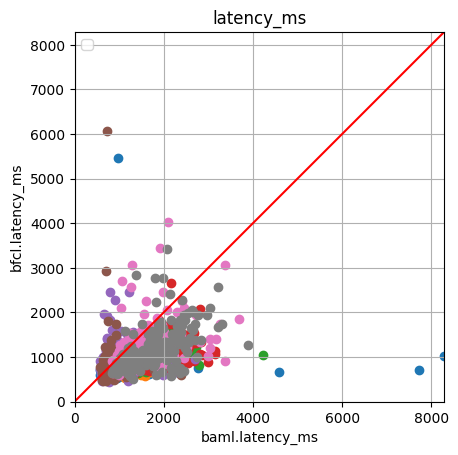

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from eval import load_data

max_val = 0
for t in load_data():

  metric = 'input_tokens'
  metric = 'output_tokens'
  metric = 'cost'
  metric = 'latency_ms'
  xlabel = f'baml.{metric}'
  ylabel = f'bfcl.{metric}'

  max_val = max(max_val, t.df[xlabel].max(), t.df[ylabel].max())

  #f = plt.figure(f'{test_category}/{metric}')
  plt.scatter(t.df[xlabel], t.df[ylabel], marker='o')  # 'o' for circle markers

  plt.title(metric)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid(True)
  plt.legend()

plt.axline((0, 0), slope=1, color='red', label='Infinite line through (0,0)')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(0, max_val)
ax.set_ylim(0, max_val)


plt.show()

/var/folders/zc/6hrv3s157t9g3n_tf8pncl7c0000gn/T/ipykernel_25391/2281982539.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/zc/6hrv3s157t9g3n_tf8pncl7c0000gn/T/ipykernel_25391/2281982539.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


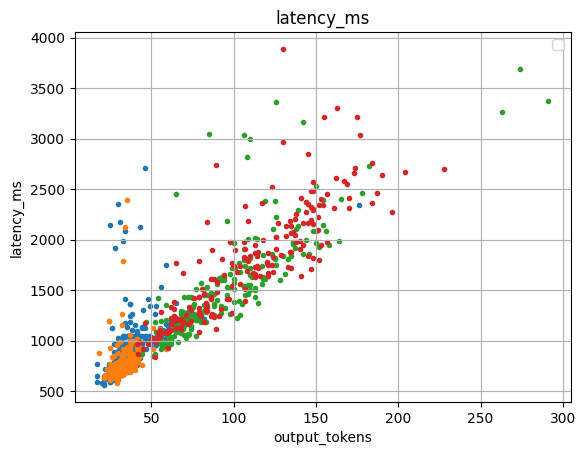

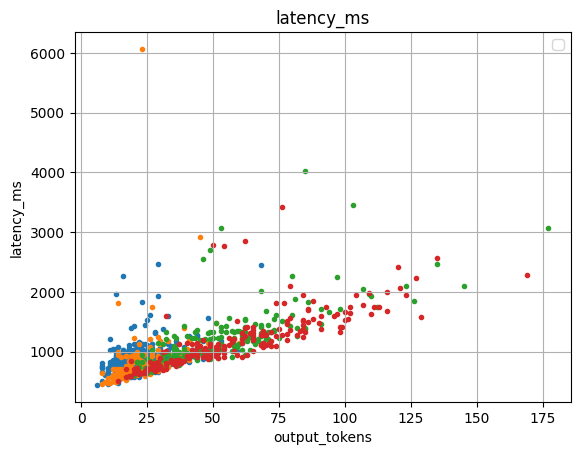

In [24]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from eval import load_data

max_val = 0
plt.figure(1)
for t in load_data():
  if 'gpt' not in t.model: continue

  metric = 'input_tokens'
  metric = 'output_tokens'
  metric = 'cost'
  metric = 'latency_ms'
  xlabel = f'baml.{metric}'
  ylabel = f'bfcl.{metric}'

  max_val = max(max_val, t.df[xlabel].max(), t.df[ylabel].max())

  #f = plt.figure(f'{test_category}/{metric}')
  plt.scatter(t.df['baml.output_tokens'], t.df['baml.latency_ms'], marker='.')
  #plt.scatter(t.df['baml.output_tokens'], t.df['baml.latency'], marker='o')  # 'o' for circle markers

  plt.title(metric)
  plt.xlabel('output_tokens')
  plt.ylabel('latency_ms')
  plt.grid(True)
  plt.legend()
plt.figure(2)
for t in load_data():
  if 'gpt' not in t.model: continue

  metric = 'input_tokens'
  metric = 'output_tokens'
  metric = 'cost'
  metric = 'latency_ms'
  xlabel = f'baml.{metric}'
  ylabel = f'bfcl.{metric}'

  max_val = max(max_val, t.df[xlabel].max(), t.df[ylabel].max())

  #f = plt.figure(f'{test_category}/{metric}')
  plt.scatter(t.df['bfcl.output_tokens'], t.df['bfcl.latency_ms'], marker='.')
  #plt.scatter(t.df['baml.output_tokens'], t.df['baml.latency'], marker='o')  # 'o' for circle markers

  plt.title(metric)
  plt.xlabel('output_tokens')
  plt.ylabel('latency_ms')
  plt.grid(True)
  plt.legend()

#plt.axline((0, 0), slope=1, color='red', label='Infinite line through (0,0)')
#ax = plt.gca()
#ax.set_aspect('equal', adjustable='box')
#ax.set_xlim(0, max_val)
#ax.set_ylim(0, max_val)


plt.show()

/var/folders/zc/6hrv3s157t9g3n_tf8pncl7c0000gn/T/ipykernel_25391/2545665611.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
/var/folders/zc/6hrv3s157t9g3n_tf8pncl7c0000gn/T/ipykernel_25391/2545665611.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


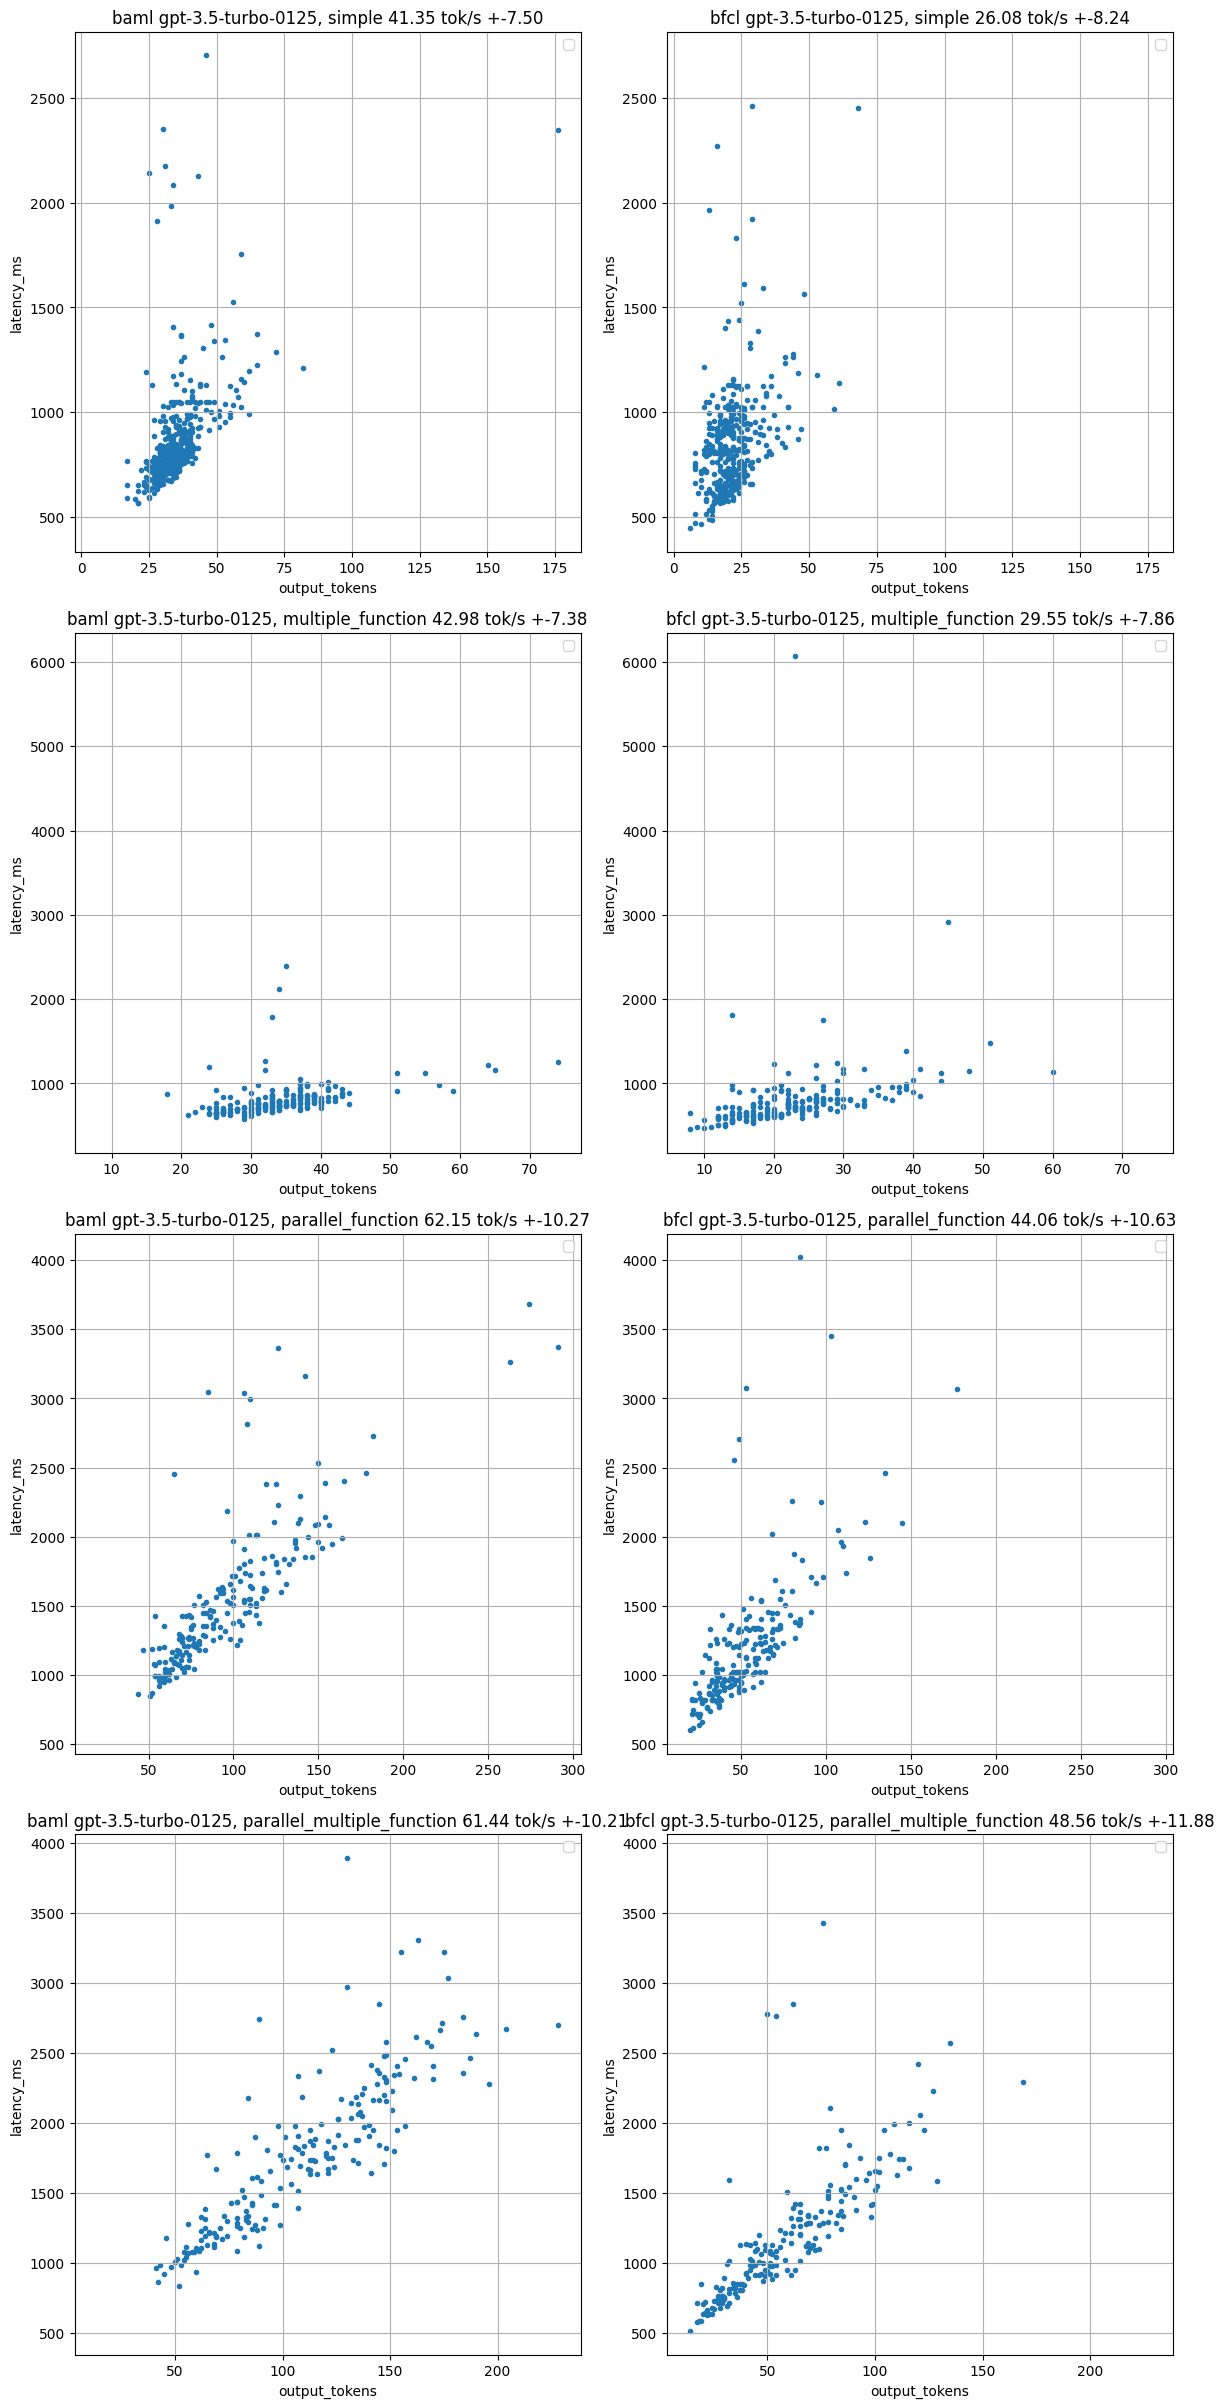

In [43]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from eval import load_data

data_sets = list(load_data())  # Load the data and convert to list for reuse
num_datasets = len(data_sets)  # Determine the number of datasets

plt.figure(figsize=(12, 6 * num_datasets))  # Adjust figure size dynamically based on number of datasets

for i, t in enumerate(data_sets):
    if 'gpt' not in t.model:
        continue

    # First subplot for 'baml'
    ax1 = plt.subplot(num_datasets, 2, 2*i + 1)  # nx2 grid, current subplot index
    metric = 'latency_ms'
    xlabel_baml = 'baml.output_tokens'
    ylabel_baml = 'baml.latency_ms'
    baml_mean_ratio = (t.df[xlabel_baml] / t.df[ylabel_baml]*1000)

    ax1.scatter(t.df[xlabel_baml], t.df[ylabel_baml], marker='.')
    ax1.set_title(f'baml {t.model}, {t.test_category} {baml_mean_ratio.mean():.2f} tok/s +-{baml_mean_ratio.std():.2f}')
    ax1.set_xlabel('output_tokens')
    ax1.set_ylabel('latency_ms')
    ax1.grid(True)
    ax1.legend()

    # Second subplot for 'bfcl'
    ax2 = plt.subplot(num_datasets, 2, 2*i + 2, sharex=ax1, sharey=ax1)  # nx2 grid, current subplot index
    xlabel_bfcl = 'bfcl.output_tokens'
    ylabel_bfcl = 'bfcl.latency_ms'
    bfcl_mean_ratio = (t.df[xlabel_bfcl] / t.df[ylabel_bfcl]*1000)
    ax2.scatter(t.df[xlabel_bfcl], t.df[ylabel_bfcl], marker='.')
    ax2.set_title(f'bfcl {t.model}, {t.test_category} {bfcl_mean_ratio.mean():.2f} tok/s +-{bfcl_mean_ratio.std():.2f}')
    ax2.set_xlabel('output_tokens')
    ax2.set_ylabel('latency_ms')
    ax2.grid(True)
    ax2.legend()

plt.tight_layout()
plt.show()


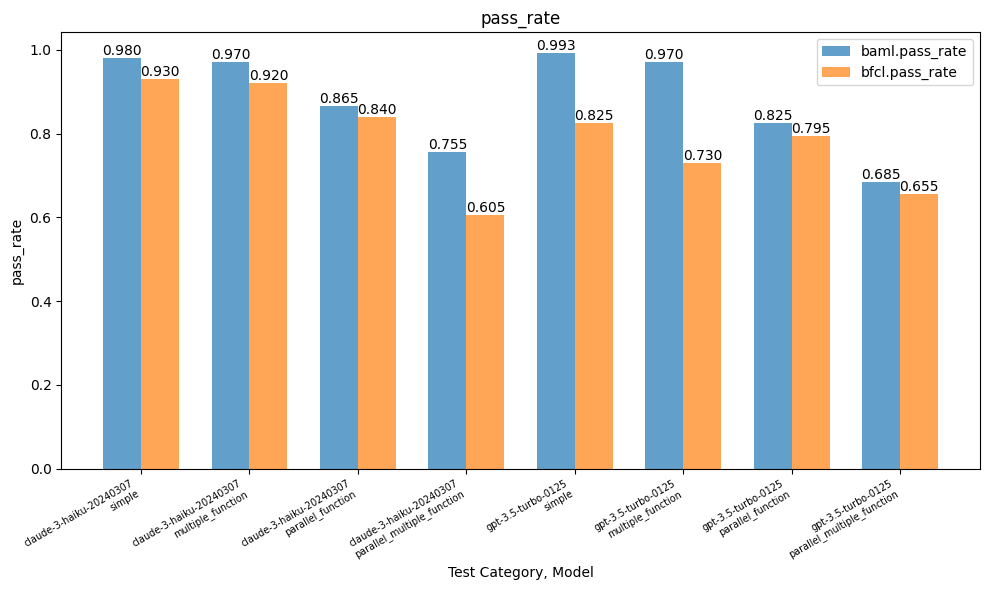

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from eval import load_data

df = pd.DataFrame(
  {
    'label_mc': f"{t.model}\n{t.test_category}",
    'baml.pass_rate': t.baml_pass_rate,
    'bfcl.pass_rate': t.bfcl_pass_rate,
  }
  for t in load_data()
)


fig, ax = plt.subplots(figsize=(10, 6))

# Set up the x positions for the groups
n = len(df)  # number of groups
index = range(n)
bar_width = 0.35

# Create bars for BAML pass_rate
baml_bars = ax.bar(index, df['baml.pass_rate'], bar_width, label='baml.pass_rate', capsize=5, alpha=0.7)
ax.bar_label(baml_bars, label_type='edge', fmt='%.3f')

# Create bars for BFCL pass_rate
bfcl_bars = ax.bar([p + bar_width for p in index], df['bfcl.pass_rate'], bar_width, label='bfcl.pass_rate', capsize=5, alpha=0.7)
ax.bar_label(bfcl_bars, label_type='edge', fmt='%.3f')

# Labeling and aesthetics
ax.set_xlabel('Test Category, Model')
ax.set_ylabel('pass_rate')
ax.set_title('pass_rate')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(df['label_mc'], rotation=30, ha='right', fontsize='x-small')
#ax.set_xticklabels([f'{row.Category}, {row.Model}' for index, row in agg_df.iterrows()])
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

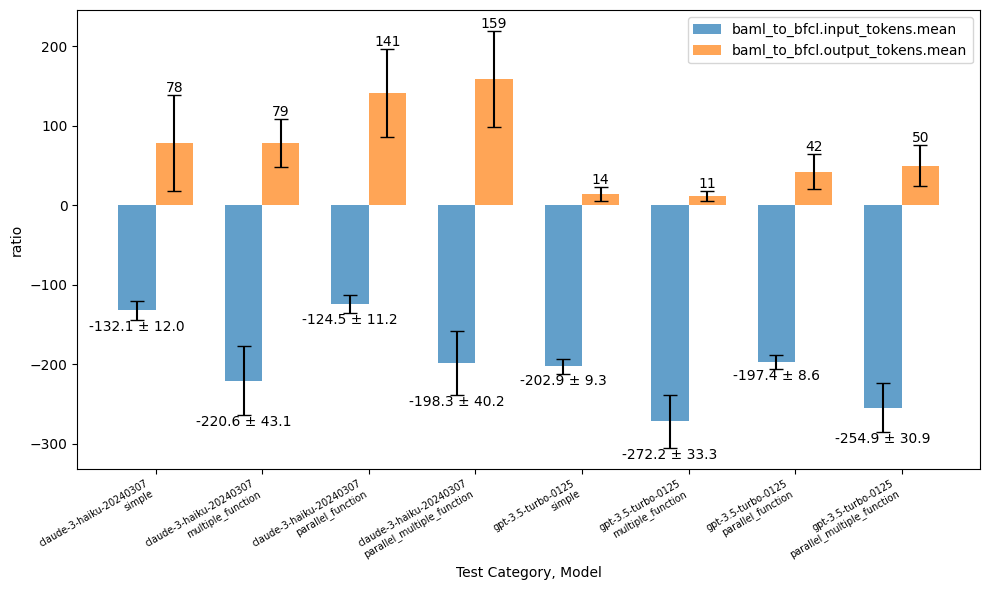

In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from eval import load_data

df = pd.DataFrame(
  {
    'label_mc': f"{t.model}\n{t.test_category}",
    'baml.pass_rate': t.baml_pass_rate,
    'bfcl.pass_rate': t.bfcl_pass_rate,
    'baml_to_bfcl.input_tokens.mean': (t.df['baml.input_tokens'] - t.df['bfcl.input_tokens']).mean(),
    'baml_to_bfcl.input_tokens.std': (t.df['baml.input_tokens'] - t.df['bfcl.input_tokens']).std(),
    'baml_to_bfcl.output_tokens.mean': (t.df['baml.output_tokens'] - t.df['bfcl.output_tokens']).mean(),
    'baml_to_bfcl.output_tokens.std': (t.df['baml.output_tokens'] - t.df['bfcl.output_tokens']).std(),
    'baml_to_bfcl.total_tokens.mean': (t.df['baml.total_tokens'] - t.df['bfcl.total_tokens']).mean(),
    'baml_to_bfcl.total_tokens.std': (t.df['baml.total_tokens'] - t.df['bfcl.total_tokens']).std(),
  }
  for t in load_data()
)


fig, ax = plt.subplots(figsize=(10, 6))

# Set up the x positions for the groups
n = len(df)  # number of groups
index = range(n)
bar_width = 0.35

# Create bars for BAML pass_rate
baml_bars = ax.bar(index, df['baml_to_bfcl.input_tokens.mean'], bar_width, yerr=df['baml_to_bfcl.input_tokens.std'], label='baml_to_bfcl.input_tokens.mean', capsize=5, alpha=0.7)
labels = [f"{mean:.0f} ± {std:.0f}" for mean, std in zip(df['baml_to_bfcl.input_tokens.mean'], df['baml_to_bfcl.input_tokens.std'])]
ax.bar_label(baml_bars, labels=labels, label_type='edge')

# Create bars for BFCL pass_rate
bfcl_bars = ax.bar([p + bar_width for p in index], df['baml_to_bfcl.output_tokens.mean'], bar_width, yerr=df['baml_to_bfcl.output_tokens.std'], label='baml_to_bfcl.output_tokens.mean', capsize=5, alpha=0.7)
labels = [f"{mean:.0f} ± {std:.0f}" for mean, std in zip(df['baml_to_bfcl.output_tokens.mean'], df['baml_to_bfcl.output_tokens.std'])]
ax.bar_label(bfcl_bars, labels=labels, label_type='edge')

# Labeling and aesthetics
ax.set_xlabel('Test Category, Model')
ax.set_ylabel('ratio')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(df['label_mc'], rotation=30, ha='right', fontsize='x-small')
#ax.set_xticklabels([f'{row.Category}, {row.Model}' for index, row in agg_df.iterrows()])
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

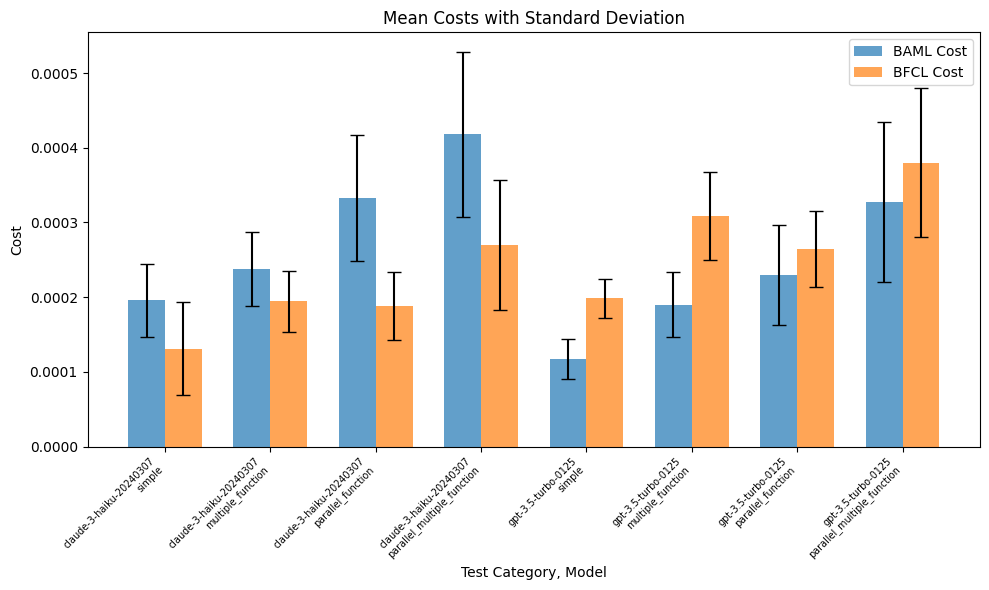

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from eval import load_data

agg_df = pd.DataFrame(
  {
    'label_mc': f"{t.model}\n{t.test_category}",
    'BAML_Mean': t.df['baml.cost'].mean(),
    'BFCL_Mean': t.df['bfcl.cost'].mean(),
    'BAML_Std': t.df['baml.cost'].std(),
    'BFCL_Std': t.df['bfcl.cost'].std()

  }
  for t in load_data()
)


fig, ax = plt.subplots(figsize=(10, 6))

# Set up the x positions for the groups
n = len(agg_df)  # number of groups
index = range(n)
bar_width = 0.35


# Create bars for BAML Cost
baml_bars = ax.bar(index, agg_df['BAML_Mean'], bar_width, label='BAML Cost', yerr=agg_df['BAML_Std'], capsize=5, alpha=0.7)

# Create bars for BFCL Cost
bfcl_bars = ax.bar([p + bar_width for p in index], agg_df['BFCL_Mean'], bar_width, label='BFCL Cost', yerr=agg_df['BFCL_Std'], capsize=5, alpha=0.7)

# Labeling and aesthetics
ax.set_xlabel('Test Category, Model')
ax.set_ylabel('Cost')
ax.set_title('Mean Costs with Standard Deviation')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(agg_df['label_mc'], rotation=30, ha='right', fontsize='x-small')
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

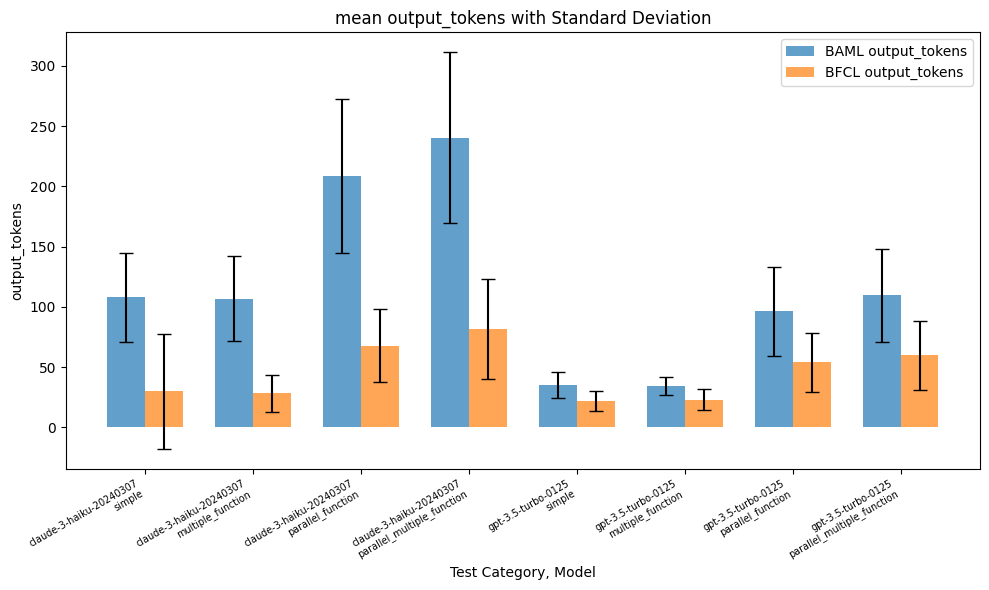

In [6]:

import json
import pandas as pd
import matplotlib.pyplot as plt

from eval import load_data

agg_df = pd.DataFrame(
  {
    'label_mc': f"{t.model}\n{t.test_category}",
    'BAML_mean': t.df['baml.output_tokens'].mean(),
    'BFCL_mean': t.df['bfcl.output_tokens'].mean(),
    'BAML_Std': t.df['baml.output_tokens'].std(),
    'BFCL_Std': t.df['bfcl.output_tokens'].std()
  }
  for t in load_data()
)


fig, ax = plt.subplots(figsize=(10, 6))

# Set up the x positions for the groups
n = len(agg_df)  # number of groups
index = range(n)
bar_width = 0.35

# Create bars for BAML output_tokens
baml_bars = ax.bar(index, agg_df['BAML_mean'], bar_width, label='BAML output_tokens', yerr=agg_df['BAML_Std'], capsize=5, alpha=0.7)

# Create bars for BFCL output_tokens
bfcl_bars = ax.bar([p + bar_width for p in index], agg_df['BFCL_mean'], bar_width, label='BFCL output_tokens', yerr=agg_df['BFCL_Std'], capsize=5, alpha=0.7)

# Labeling and aesthetics
ax.set_xlabel('Test Category, Model')
ax.set_ylabel('output_tokens')
ax.set_title('mean output_tokens with Standard Deviation')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(agg_df['label_mc'], rotation=30, ha='right', fontsize='x-small')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

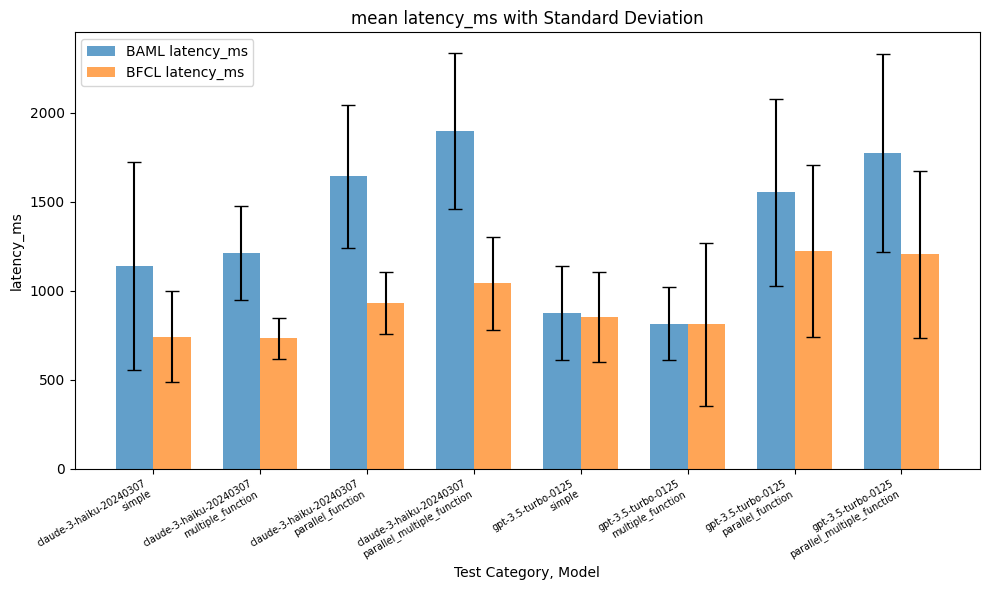

In [7]:


import json
import pandas as pd
import matplotlib.pyplot as plt

from eval import load_data

agg_df = pd.DataFrame(
  {
    'label_mc': f"{t.model}\n{t.test_category}",
    'BAML_mean': t.df['baml.latency_ms'].mean(),
    'BFCL_mean': t.df['bfcl.latency_ms'].mean(),
    'BAML_Std': t.df['baml.latency_ms'].std(),
    'BFCL_Std': t.df['bfcl.latency_ms'].std()
  }
  for t in load_data()
)


fig, ax = plt.subplots(figsize=(10, 6))

# Set up the x positions for the groups
n = len(agg_df)  # number of groups
index = range(n)
bar_width = 0.35

# Create bars for BAML latency_ms
baml_bars = ax.bar(index, agg_df['BAML_mean'], bar_width, label='BAML latency_ms', yerr=agg_df['BAML_Std'], capsize=5, alpha=0.7)

# Create bars for BFCL latency_ms
bfcl_bars = ax.bar([p + bar_width for p in index], agg_df['BFCL_mean'], bar_width, label='BFCL latency_ms', yerr=agg_df['BFCL_Std'], capsize=5, alpha=0.7)

# Labeling and aesthetics
ax.set_xlabel('Test Category, Model')
ax.set_ylabel('latency_ms')
ax.set_title('mean latency_ms with Standard Deviation')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(agg_df['label_mc'], rotation=30, ha='right', fontsize='x-small')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/zc/6hrv3s157t9g3n_tf8pncl7c0000gn/T/ipykernel_25391/3803128361.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['label_mc'], rotation=30, fontsize='x-small')


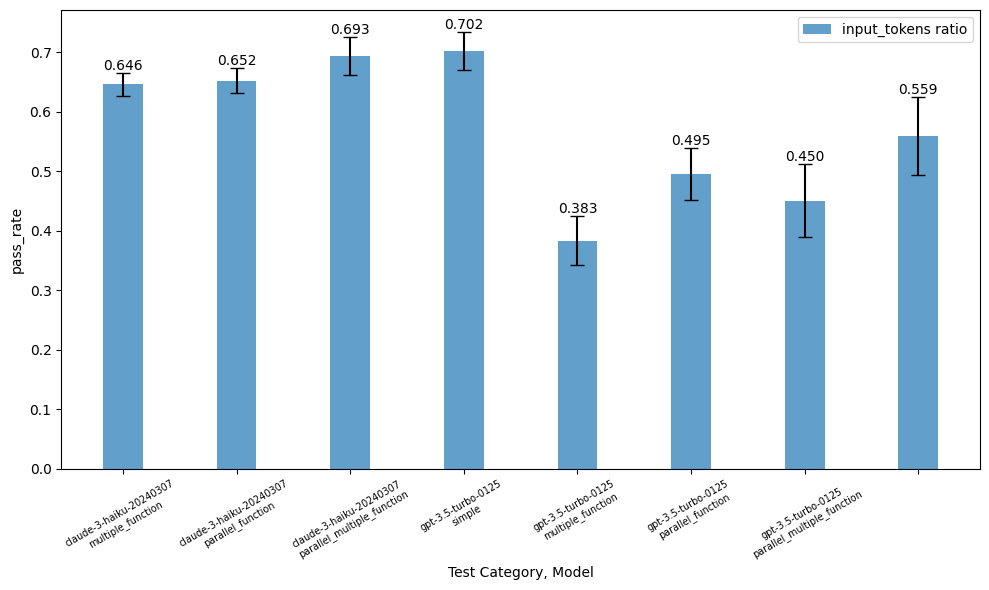

In [8]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from eval import load_data


data = []

df = pd.DataFrame(
  {
    'label_mc': f"{t.model}\n{t.test_category}",
    'BAML_median': (t.df['baml.output_tokens'] / t.df['baml.latency_ms']).median(),
    'BAML_std': (t.df['baml.input_tokens'] / t.df['bfcl.input_tokens']).std(),
  }
  for t in load_data()
)


fig, ax = plt.subplots(figsize=(10, 6))

# Set up the x positions for the groups
n = len(df)  # number of groups
index = range(n)
bar_width = 0.35

# Create bars for BAML_Median
baml_bars = ax.bar(index, df['BAML_median'], bar_width, yerr=df['BAML_std'], label='input_tokens ratio', capsize=5, alpha=0.7)
ax.bar_label(baml_bars, label_type='edge', fmt='%.3f')
#ax.bar_label(baml_bars, labels=df['label_mc'], label_type='center', fmt='%.3f')

# Labeling and aesthetics
ax.set_xlabel('Test Category, Model')
ax.set_ylabel('pass_rate')
ax.set_xticklabels(df['label_mc'], rotation=30, fontsize='x-small')
#ax.set_xticklabels([f'{row.Category}, {row.Model}' for index, row in agg_df.iterrows()])
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

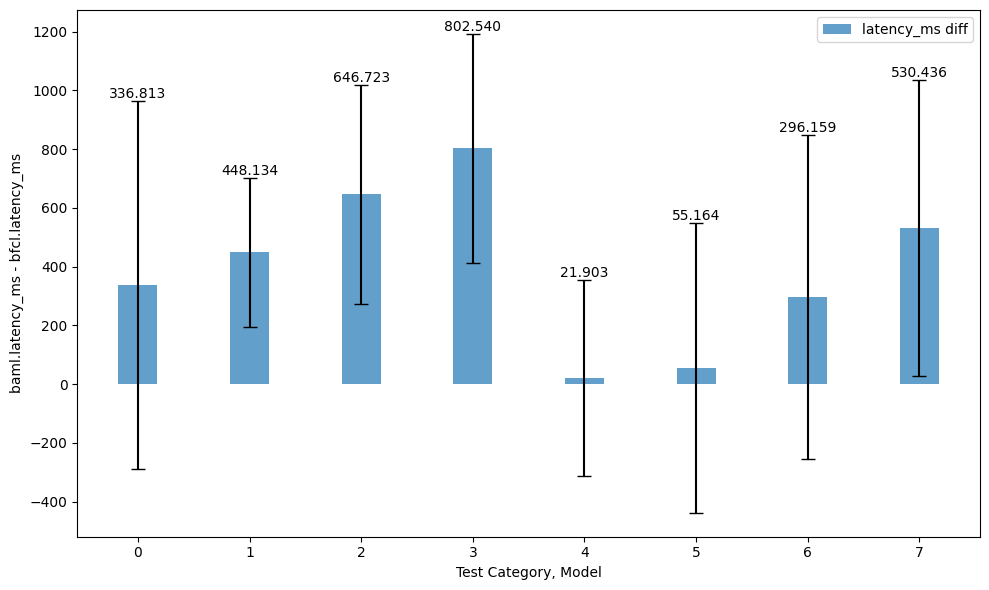

In [9]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from eval import load_data


metric = 'latency_ms'

df = pd.DataFrame(
  {
    'label_mc': f"{t.model}\n{t.test_category}",
    'BAML_median': (t.df[f'baml.{metric}'] - t.df[f'bfcl.{metric}']).median(),
    'BAML_std': (t.df[f'baml.{metric}'] - t.df[f'bfcl.{metric}']).std(),
  }
  for t in load_data()
)


fig, ax = plt.subplots(figsize=(10, 6))

# Set up the x positions for the groups
n = len(df)  # number of groups
index = range(n)
bar_width = 0.35

# Create bars for BAML_Median
baml_bars = ax.bar(index, df['BAML_median'], bar_width, yerr=df['BAML_std'], label=f'{metric} diff', capsize=5, alpha=0.7)
ax.bar_label(baml_bars, label_type='edge', fmt='%.3f')
#ax.bar_label(baml_bars, labels=df['label_mc'], label_type='center', fmt='%.3f')

# Labeling and aesthetics
ax.set_xlabel('Test Category, Model')
ax.set_ylabel('baml.latency_ms - bfcl.latency_ms')
#ax.set_xticklabels(df['label_mc'], rotation=30, fontsize='x-small')
#ax.set_xticklabels([f'{row.Category}, {row.Model}' for index, row in agg_df.iterrows()])
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

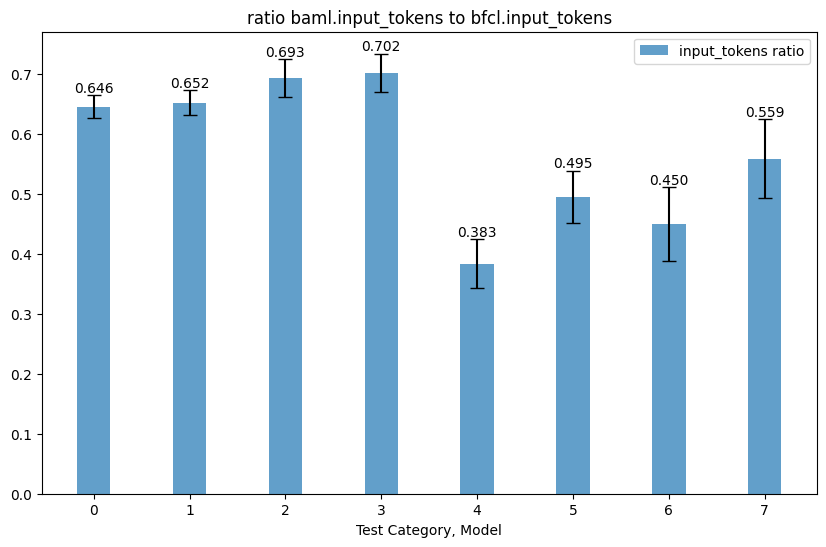

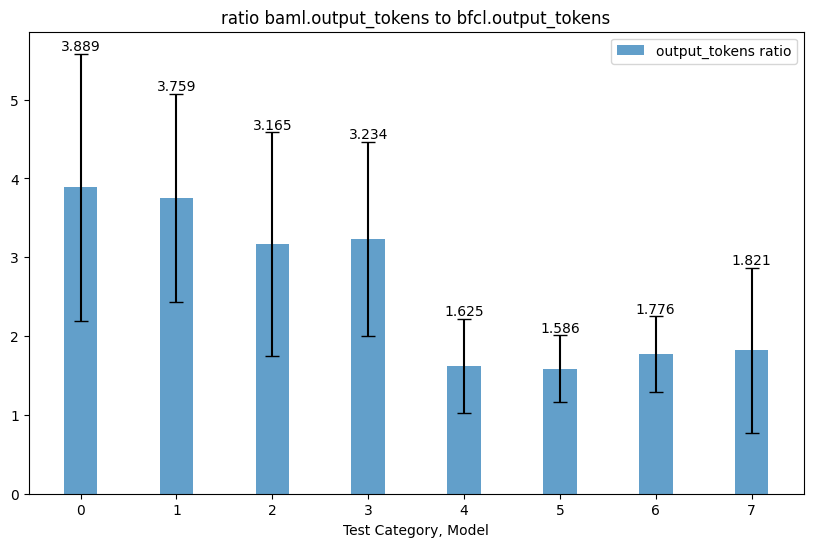

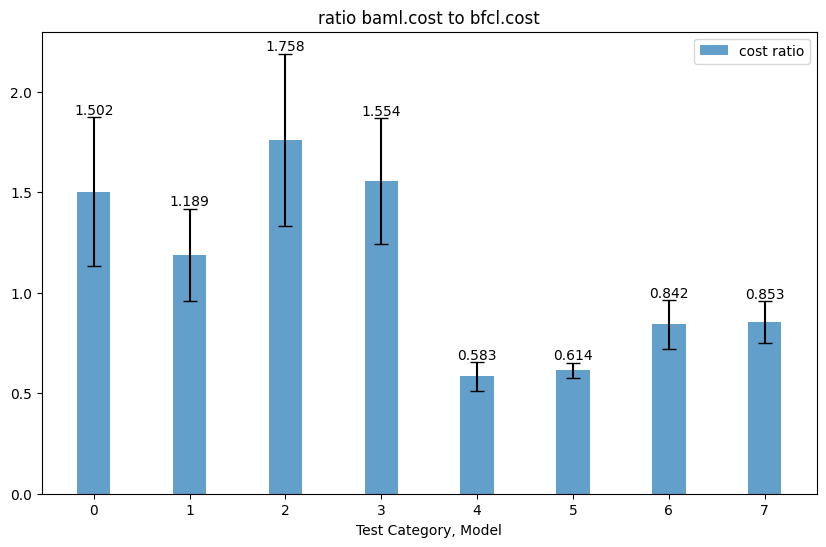

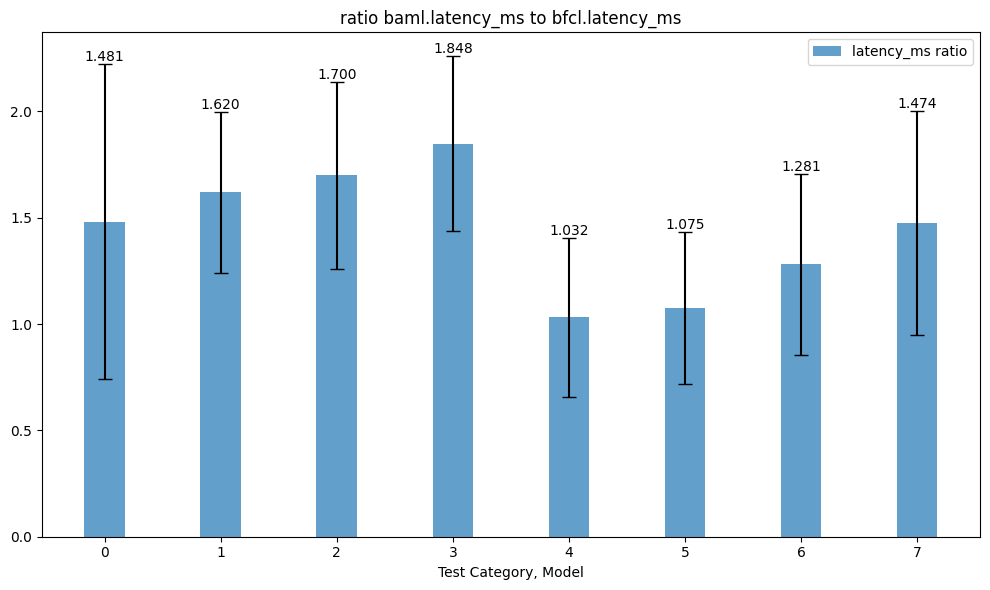

In [16]:

import json
import pandas as pd
import matplotlib.pyplot as plt

from eval import load_data


for i, metric in enumerate(metrics):
  plt.figure(i)

  df = pd.DataFrame(
    {
      'label_mc': f"{t.model}\n{t.test_category}",
      'BAML_median': (t.df[f'baml.{metric}'] / t.df[f'bfcl.{metric}']).median(),
      'BAML_std': (t.df[f'baml.{metric}'] / t.df[f'bfcl.{metric}']).std(),
    }
    for t in load_data()
  )


  fig, ax = plt.subplots(figsize=(10, 6))

  # Set up the x positions for the groups
  n = len(df)  # number of groups
  index = range(n)
  bar_width = 0.35

  # Create bars for BAML_Median
  baml_bars = ax.bar(index, df['BAML_median'], bar_width, yerr=df['BAML_std'], label=f'{metric} ratio', capsize=5, alpha=0.7)
  ax.bar_label(baml_bars, label_type='edge', fmt='%.3f')
  #ax.bar_label(baml_bars, labels=df['label_mc'], label_type='center', fmt='%.3f')

  # Labeling and aesthetics
  ax.set_xlabel('Test Category, Model')
  ax.set_title(f'ratio baml.{metric} to bfcl.{metric}')
  #ax.set_xticklabels(df['label_mc'], rotation=30, fontsize='x-small')
  #ax.set_xticklabels([f'{row.Category}, {row.Model}' for index, row in agg_df.iterrows()])
  ax.legend()

# Show the plot
plt.tight_layout()
plt.show()